In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('pokemon.csv')
data.head()

,nombre,indice_guia,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,Weight,Height,Legendario,generacion,fuerza_combate
0,Bulbasaur,1,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,No,1,1115
1,Ivysaur,2,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,No,1,1699
2,Venusaur,3,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,No,1,2720
3,Charmander,4,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,No,1,980
4,Charmeleon,5,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,No,1,1653


In [3]:
data.shape

(649, 15)

In [4]:
data.drop(columns=['indice_guia'],inplace=True)

In [5]:
nombres_nuevos={'Weight':'peso','Height':'altura'}
data.rename(columns=nombres_nuevos,inplace=True)
data.head(2)

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.2,0.10,6.9,0.7,No,1,1115
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.1,0.07,13.0,1.0,No,1,1699


In [6]:
data.isna().sum()

nombre             0
resistencia        5
ataque             5
defensa            5
tipo_primario      5
tipo_secundario    5
max_salud          5
tasa_captura       5
tasa_escape        5
peso               0
altura             4
Legendario         1
generacion         0
fuerza_combate     0
dtype: int64

In [7]:
data[data['resistencia'].isna()]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate
175,Togetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,0.61,No,2,1708
248,Lugia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216.0,5.21,Sí,2,3703
345,Cradily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.4,1.50,No,3,2211
568,Garbodor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.3,1.90,No,5,2345
580,Swanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.2,1.30,No,5,2088


In [8]:
data.dropna(axis=0, thresh=8,inplace=True)
data.isna().sum()

nombre             0
resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
max_salud          0
tasa_captura       0
tasa_escape        0
peso               0
altura             4
Legendario         1
generacion         0
fuerza_combate     0
dtype: int64

In [9]:
data[data['altura'].isna()]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate
123,Jynx,163.0,223.0,151.0,Ice,Psychic,140.0,0.3,0.09,40.6,NaN,No,1,2555
128,Magikarp,85.0,29.0,85.0,Water,None,79.0,0.7,0.15,10.0,NaN,No,1,274
352,Shuppet,127.0,138.0,65.0,Ghost,None,112.0,0.4,0.10,2.3,NaN,No,3,1018
435,Bronzor,149.0,43.0,154.0,Steel,Psychic,129.0,0.5,0.10,60.5,NaN,No,4,603


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


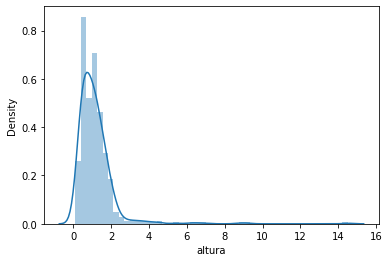

In [10]:
sns.distplot(data['altura'])

In [11]:
data[data['altura']<=0.15]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate
594,Joltik,137.0,110.0,98.0,Bug,Electric,120.0,0.3,0.1,0.6,0.1,No,5,1023


In [12]:
promedio_altura= data['altura'].mean()
print(promedio_altura)

filtro = data['altura'].isna()
datos_filtrados = data.loc[filtro]

promedio_altura = 1.1
data.loc[filtro, 'altura'] = promedio_altura

data[filtro]

1.1431406249999998


,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate
123,Jynx,163.0,223.0,151.0,Ice,Psychic,140.0,0.3,0.09,40.6,1.1,No,1,2555
128,Magikarp,85.0,29.0,85.0,Water,None,79.0,0.7,0.15,10.0,1.1,No,1,274
352,Shuppet,127.0,138.0,65.0,Ghost,None,112.0,0.4,0.10,2.3,1.1,No,3,1018
435,Bronzor,149.0,43.0,154.0,Steel,Psychic,129.0,0.5,0.10,60.5,1.1,No,4,603


In [13]:
print(data['Legendario'].unique())
data['Legendario'].value_counts()

No    605
Sí     38
Name: Legendario, dtype: int64

In [14]:
display(data[data['Legendario'].isna()])
nulo_legendario = data['Legendario'].isna()
data.loc[nulo_legendario, "Legendario"] = "No"

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate
162,Hoothoot,155.0,67.0,88.0,Normal,Flying,134.0,0.5,0.15,21.2,0.71,NaN,2,677


In [15]:
data.loc[nulo_legendario]

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate
162,Hoothoot,155.0,67.0,88.0,Normal,Flying,134.0,0.5,0.15,21.2,0.71,No,2,677


In [16]:
data.isna().sum()

nombre             0
resistencia        0
ataque             0
defensa            0
tipo_primario      0
tipo_secundario    0
max_salud          0
tasa_captura       0
tasa_escape        0
peso               0
altura             0
Legendario         0
generacion         0
fuerza_combate     0
dtype: int64

In [17]:
data['Legendario'].unique()

array(['No', 'Sí'], dtype=object)

In [18]:
def cambiar_valor(valor):
  if valor == 'Sí':
    return 1
  else:
    return 0


data['Legendario_binarizado'] = data['Legendario'].apply(cambiar_valor)
display(data[data['Legendario']=="Sí"].head(2))
data.head(2)

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate,Legendario_binarizado
143,Articuno,207.0,192.0,236.0,Ice,Flying,175.0,0.03,0.1,55.4,1.7,Sí,1,3051,1
144,Zapdos,207.0,253.0,185.0,Electric,Flying,175.0,0.03,0.1,52.6,1.6,Sí,1,3527,1


,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,Legendario,generacion,fuerza_combate,Legendario_binarizado
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.2,0.10,6.9,0.7,No,1,1115,0
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.1,0.07,13.0,1.0,No,1,1699,0


In [19]:
data.drop(columns=['Legendario'], inplace=True)
data.head()

,nombre,resistencia,ataque,defensa,tipo_primario,tipo_secundario,max_salud,tasa_captura,tasa_escape,peso,altura,generacion,fuerza_combate,Legendario_binarizado
0,Bulbasaur,128.0,118.0,111.0,Grass,Poison,113.0,0.20,0.10,6.9,0.7,1,1115,0
1,Ivysaur,155.0,151.0,143.0,Grass,Poison,134.0,0.10,0.07,13.0,1.0,1,1699,0
2,Venusaur,190.0,198.0,189.0,Grass,Poison,162.0,0.05,0.05,100.0,2.0,1,2720,0
3,Charmander,118.0,116.0,93.0,Fire,None,105.0,0.20,0.10,8.5,0.6,1,980,0
4,Charmeleon,151.0,158.0,126.0,Fire,None,131.0,0.10,0.07,19.0,1.1,1,1653,0


In [20]:
data_tipo = data[["tipo_primario","tipo_secundario"]]
data_limpia = data.join(pd.get_dummies(data_tipo, prefix=['tipo_pri','tipo_sec']))
data_limpia.drop(columns=['tipo_primario','tipo_secundario'], inplace=True)
data_limpia.head()

,nombre,resistencia,ataque,defensa,max_salud,tasa_captura,tasa_escape,peso,altura,generacion,...,tipo_sec_Ghost,tipo_sec_Grass,tipo_sec_Ground,tipo_sec_Ice,tipo_sec_None,tipo_sec_Poison,tipo_sec_Psychic,tipo_sec_Rock,tipo_sec_Steel,tipo_sec_Water
0,Bulbasaur,128.0,118.0,111.0,113.0,0.20,0.10,6.9,0.7,1,...,0,0,0,0,0,1,0,0,0,0
1,Ivysaur,155.0,151.0,143.0,134.0,0.10,0.07,13.0,1.0,1,...,0,0,0,0,0,1,0,0,0,0
2,Venusaur,190.0,198.0,189.0,162.0,0.05,0.05,100.0,2.0,1,...,0,0,0,0,0,1,0,0,0,0
3,Charmander,118.0,116.0,93.0,105.0,0.20,0.10,8.5,0.6,1,...,0,0,0,0,1,0,0,0,0,0
4,Charmeleon,151.0,158.0,126.0,131.0,0.10,0.07,19.0,1.1,1,...,0,0,0,0,1,0,0,0,0,0


In [21]:
data_selecionada = data[["ataque","fuerza_combate"]]
data_selecionada.head(4)

,ataque,fuerza_combate
0,118.0,1115
1,151.0,1699
2,198.0,2720
3,116.0,980


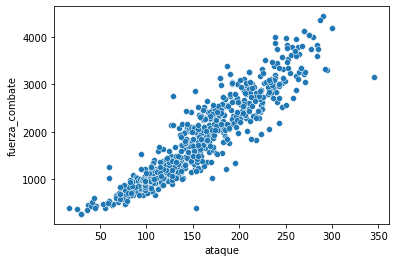

In [22]:
sns.scatterplot(data = data, x='ataque', y='fuerza_combate')

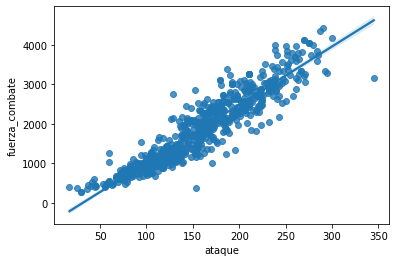

In [23]:
sns.regplot(data = data, x='ataque', y='fuerza_combate')

In [24]:
x = data_limpia.drop(columns=['fuerza_combate','nombre'])
y = data['fuerza_combate']
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
x_train

,resistencia,ataque,defensa,max_salud,tasa_captura,tasa_escape,peso,altura,generacion,Legendario_binarizado,...,tipo_sec_Ghost,tipo_sec_Grass,tipo_sec_Ground,tipo_sec_Ice,tipo_sec_None,tipo_sec_Poison,tipo_sec_Psychic,tipo_sec_Rock,tipo_sec_Steel,tipo_sec_Water
614,190.0,190.0,218.0,162.0,0.20,0.07,148.0,1.10,5,0,...,0,0,0,0,1,0,0,0,0,0
567,137.0,96.0,122.0,120.0,0.30,0.09,31.0,0.60,5,0,...,0,0,0,0,1,0,0,0,0,0
237,128.0,153.0,91.0,113.0,0.00,0.20,6.0,0.41,2,0,...,0,0,0,0,0,0,1,0,0,0
223,181.0,197.0,141.0,154.0,0.15,0.07,28.5,0.89,2,0,...,0,0,0,0,1,0,0,0,0,0
628,172.0,105.0,139.0,147.0,0.30,0.10,9.0,0.50,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,128.0,55.0,55.0,113.0,0.50,0.20,2.9,0.30,1,0,...,0,0,0,0,1,0,0,0,0,0
362,172.0,95.0,90.0,147.0,0.50,0.10,39.5,0.79,3,0,...,0,0,0,0,0,0,0,0,0,1
193,146.0,75.0,66.0,127.0,0.40,0.10,8.5,0.41,2,0,...,0,0,1,0,0,0,0,0,0,0
634,211.0,256.0,188.0,178.0,0.05,0.05,160.0,1.80,5,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)
print (f'El coeficiente de regresion lineal dio {modelo.coef_}')
print (f'La ordenada al origen dio: {modelo.intercept_}')
x_train.columns
y_pred = modelo.predict(x_test)
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

El coeficiente de regresion lineal dio [ 4.02812137e+00  1.06856378e+01  5.53159798e+00 -6.01763557e-03
  1.40723122e+01  4.29530874e+02  5.44616189e-01 -1.42228827e+01
  3.37668960e+00  1.84908207e+02  3.23696842e+01 -1.72230730e+01
  6.68293206e+01  1.79367363e+01  1.08478255e+02  1.17116759e+01
 -4.80216666e+00 -4.16959832e+01 -7.30957794e+01  2.26977724e+01
  1.67131832e+00 -1.14442204e+01  1.45340504e+01  3.10737116e+01
 -1.86268650e+01 -8.93264790e+01 -7.24645829e+01  2.13766246e+01
 -1.42108547e-14 -5.53682926e+01  2.75446299e+01 -2.22072248e+00
  4.87340794e+01 -9.26708948e+00  4.51789501e+01  7.36502843e+00
 -9.01709249e+01  2.67226244e+01  5.19376119e+01 -3.15922683e+01
  2.91966337e+00 -6.63994694e+00  4.16285407e+01  1.04818218e+00
 -9.58502829e+01  3.80302171e+01]
La ordenada al origen dio: -1341.4543162706796
El R cuadrado para este ajuste dio: 0.9741525718434352


In [26]:
x = data.drop(columns=['fuerza_combate','nombre','tipo_primario','tipo_secundario'])
y = data['fuerza_combate']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)
print (f'El coeficiente de regresion dio {modelo.coef_}')
print (f'La ordenada al origen dio: {modelo.intercept_}')
x_train.columns
y_pred = modelo.predict(x_test)
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

El coeficiente de regresion dio [ 3.53272034e+00  1.06067747e+01  5.27728543e+00  9.44356588e-01
 -1.83338684e+01  4.36279489e+02  4.09237860e-01 -5.88873695e+00
 -2.30353522e-01  2.01841311e+02]
La ordenada al origen dio: -1322.4201286550538
El R cuadrado para este ajuste dio: 0.9745050702887947


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


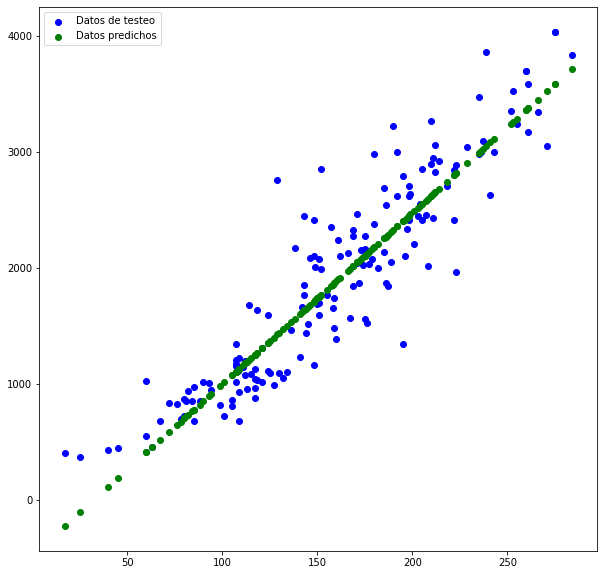

El R cuadrado para este ajuste dio: 0.8431926480981984


In [27]:
X=data['ataque']
y=data['fuerza_combate']
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0)

x_train_o = x_train.copy()
x_test_o = x_test.copy()

x_train = x_train.to_numpy()
x_train = np.matrix(x_train.reshape(len(x_train),1))
x_test = x_test.to_numpy()
x_test = np.matrix(x_test.reshape(len(x_test),1))
modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)

plt.figure(figsize = (10,10))
plt.scatter(x_test_o, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test_o, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')